4. Mode mass of IMF(M): 0.04023505548869293
5. Average mass of stars from IMF(M): 0.5458176702317216
Minimum number of bins for <1% error: 11


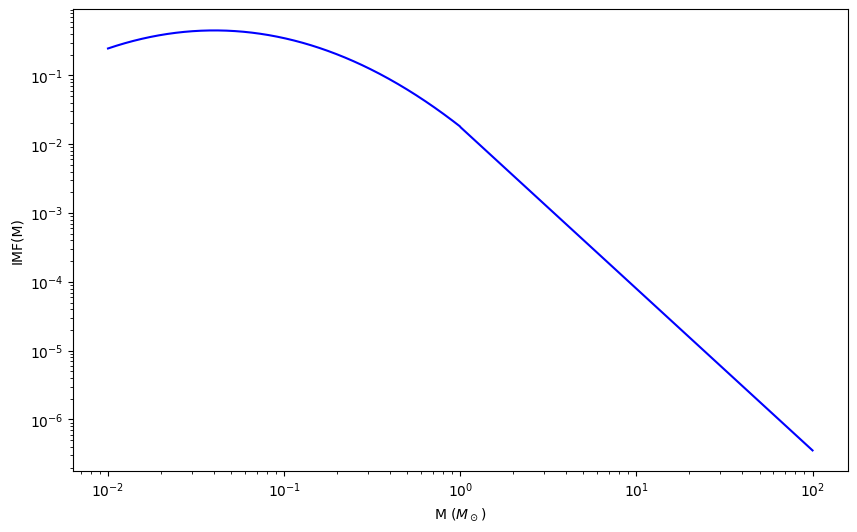

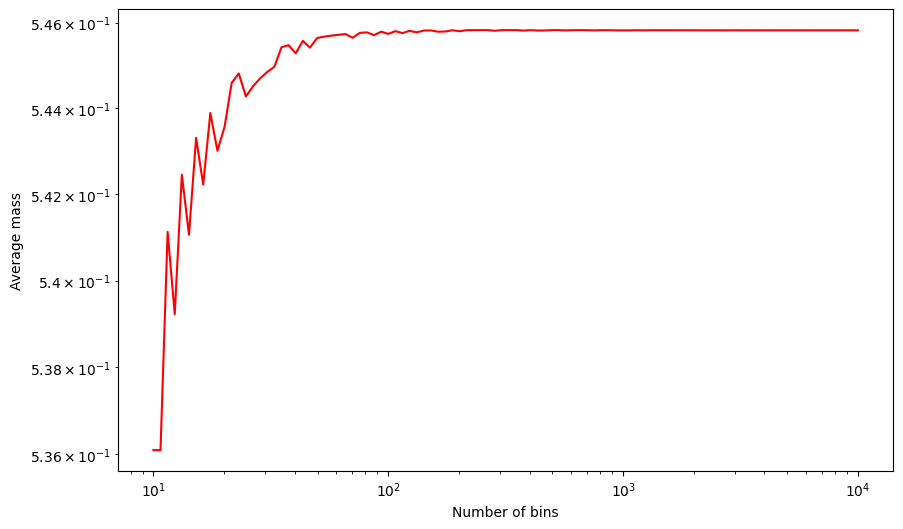

In [16]:
import numpy as np, matplotlib.pyplot as plt

# ---------- 2. ----------
# Define the Initial Mass Function (IMF)
def IMF(M_min, M_max, n_bins):
    # Create a logarithmically-scaled grid
    M_range = np.logspace(np.log10(M_min), np.log10(M_max), n_bins)
    IMF_values = []
    for M in M_range:
        if M <= 1:
            IMF_values.append(0.093/(np.log(10)*M) * np.exp(-(np.log10(M) - np.log10(0.2))**2 / (2*0.55**2)))
        else:
            IMF_values.append(0.041/np.log(10) * M**(-2.35))
    return np.array(M_range), np.array(IMF_values)

# --------- 3. ----------
# Plot IMF
n_bins = 1000
M_range, IMF_values = IMF(1e-2, 1e2, n_bins)
plt.figure(figsize=(10, 6))
plt.loglog(M_range, IMF_values, color='blue')
plt.xlabel(rf'M ($M_\odot$)')
plt.ylabel('IMF(M)')
plt.savefig('3.3.pdf')

# ---------- 4. ----------
# Compute the the mode mass of IMF(M)
mode_M = M_range[np.argmax(IMF_values)]
print(f'4. Mode mass of IMF(M): {mode_M}')

# ---------- 5. ----------
# Compute the average mass of stars from IMF(M)
def average_mass(M_range, IMF_values):
    norm = np.trapezoid(IMF_values, M_range)
    mean_M = np.trapezoid(M_range * IMF_values, M_range) / norm
    return mean_M

mean_M = average_mass(M_range, IMF_values)
print(f'5. Average mass of stars from IMF(M): {mean_M}')

# ---------- 6. ----------
# Test how average star mass depends on the number of bins
n_bins_range = np.logspace(1, 4, 100)

# Approximate true average mass with very high resolution
true_n_bins = int(1e7)
M_range_true, IMF_values_true = IMF(1e-2, 1e2, true_n_bins)
true_mean_M = average_mass(M_range_true, IMF_values_true)

# Compute average mass and error for different numbers of bins
average_masses = []
errors = []

for n_bins in n_bins_range:
    M_range, IMF_values = IMF(1e-2, 1e2, int(n_bins))
    mean_M = average_mass(M_range, IMF_values)
    error = abs(mean_M - true_mean_M) / true_mean_M * 100  # percentage error
    average_masses.append(mean_M)
    errors.append(error)

# Find number of bins needed for 1% error
for bins, err in zip(n_bins_range, errors):
    if err < 1:
        print(f'Minimum number of bins for <1% error: {int(bins)}')
        break

# Plot average mass vs number of bins
plt.figure(figsize=(10, 6))
plt.loglog(n_bins_range, average_masses, color='red')
plt.xlabel('Number of bins')
plt.ylabel('Average mass')
plt.savefig('3.6.pdf')

In [17]:
# ---------- 7. ----------
# Find average mass for M_max -> inf
Mmax_range = np.logspace(2, 5, 100)  # From 1e2 to 1e5
average_masses_max = []

for M_max in Mmax_range:
    M_range, IMF_values = IMF(1e-2, M_max, 1000)
    mean_M = average_mass(M_range, IMF_values)
    average_masses_max.append(mean_M)

rounded_final_mass = round(average_masses_max[-1], 2)
for Mmax, avg_mass in zip(Mmax_range, average_masses_max):
    if round(avg_mass, 2) == rounded_final_mass:
        print(f'Average mass converges to {rounded_final_mass} at Mmax ≈ {Mmax:.2g}')
        break

Average mass converges to 0.62 at Mmax ≈ 3.3e+04
